In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")

C:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#load data
data = pd.read_csv(r"C:\Users\Anindya Basu\Documents\Breast_Cancer\data.csv")

#check missing values
print("Checking missing values\n")
print(data.isnull().sum())

Checking missing values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [3]:
#make it as a data frame
df = pd.DataFrame(data)
print("\n")
#print data shape
print("Shape of data\n",df.shape)



Shape of data
 (569, 32)


In [4]:
#counts in each class
print("\n")
print("Counts in each class\n")
count = df['diagnosis'].value_counts()
print(count)



Counts in each class

B    357
M    212
Name: diagnosis, dtype: int64


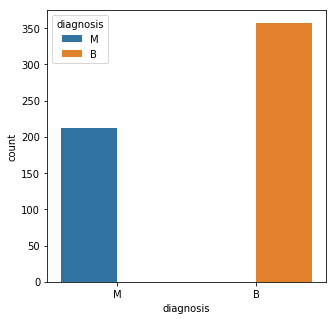

In [5]:
#Count plot for target
plt.rcParams["figure.figsize"] = [5,5]
sns.countplot(x='diagnosis',hue='diagnosis', data=df)
plt.show()

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


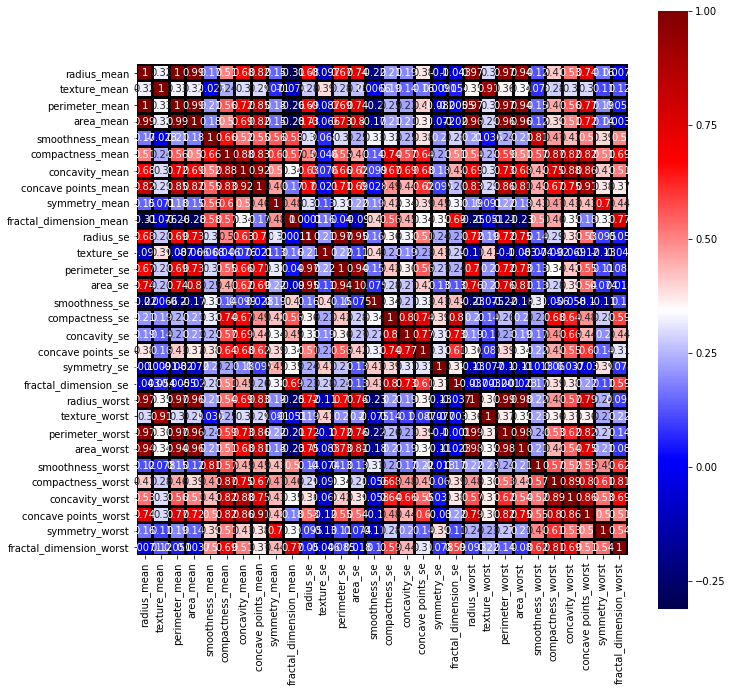

In [6]:
#correlation
features_mean=list(data.columns[1:32])
print(features_mean)
plt.figure(figsize=(11,11))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='seismic', linewidths=2, linecolor='black')
plt.show()

In [7]:
#Define X and y variable
X = df.iloc[:,2:32]
y = df.iloc[:,1]

#scale the input data
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#training set and testing set
print("\n")
print("Training data set\n",X_train,"\n",y_train)
print("\n")
print("Testing data set\n",X_test)



Training data set
 [[-0.74902829 -1.09363975 -0.74055999 ... -0.61357437  0.06510643
   0.43524596]
 [-1.03304249 -0.15815877 -1.03424611 ... -0.75107054 -1.11263786
  -0.30621768]
 [-0.5331775  -0.31407227 -0.56426593 ... -0.49480691  0.34336469
  -0.14551181]
 ...
 [-1.33239345 -0.22564372 -1.32422512 ... -0.97581512 -0.72275273
  -0.14329518]
 [-1.25173342 -0.24891439 -1.28674204 ... -1.74506282 -1.60444316
  -1.01720262]
 [-0.74334801  1.07984094 -0.71872918 ... -0.27523937 -1.2760337
   0.1869831 ]] 
 478    B
303    B
155    B
186    M
101    B
97     B
20     B
153    B
54     M
30     M
531    B
49     B
100    M
336    B
299    B
347    B
502    B
56     M
144    B
60     B
6      M
8      M
474    B
320    B
252    M
202    M
246    B
240    B
38     M
436    B
      ..
459    B
510    B
151    B
244    M
543    B
544    B
265    M
288    B
423    B
147    B
177    M
99     M
448    B
431    B
115    B
72     M
537    B
174    B
87     M
551    B
486    B
314    B
396    B


In [ ]:
#Build the classifier
classifier = RandomForestClassifier(n_estimators=10000,random_state=42,n_jobs=-1, max_features=31, oob_score=True)

#train the classifier
classifier.fit(X_train,y_train)

#predict the test data
y_pred = classifier.predict(X_test)

In [36]:
#Evaluate the model
print("\n")
print("Classification report\n")
print(classification_report(y_test, y_pred))
print("Confusion matrix\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuracy score")
print(accuracy_score(y_test, y_pred)*100)
print("\n")



Classification report

             precision    recall  f1-score   support

          B       0.99      0.96      0.98       108
          M       0.94      0.98      0.96        63

avg / total       0.97      0.97      0.97       171

Confusion matrix

[[104   4]
 [  1  62]]


Accuracy score
97.07602339181285




In [10]:
#Precision calulation from scratch
cm = confusion_matrix(y_test, y_pred)
print("Precision:\n")
def precision(cm):
    p = (cm[0][0]/((cm[0][0])+(cm[1][0])))
    if (str(p) == 'nan'):
        print("Precision B – ","0.00")
    else:
        print("Precision B – ",round(p*100,2))
precision(cm)

def precision1(cm):
    p1 = (cm[1][1]/((cm[1][1])+(cm[0][1])))
    if (str(p1) == 'nan'):
        print("Precision M – ","0.00")
    else:
        print("Precision M – ",round(p1*100,2))
precision1(cm)

#recall calculation
print("\n")
print("Recall:\n")
def recall(cm):
    p = (cm[0][0]/((cm[0][0])+(cm[0][1])))
    if (str(p) == 'nan'):
        print("Recall B – ","0.00")
    else:
        print("Recall B – ",round(p*100,2))
recall(cm)

def recall1(cm):
    p1 = (cm[1][1]/((cm[1][1])+(cm[1][0])))
    if (str(p1) == 'nan'):
        print("Recall M – ","0.00")
    else:
        print("Recall M – ",round(p1*100,2))
recall1(cm)

Precision:

Precision B –  96.97
Precision M –  93.75


Recall:

Recall B –  95.52
Recall M –  95.74


In [11]:
#predict new comment
print("\n")
print("New prediction")
new = [[15.34,14.26,102.5,704.4,0.1073,0.2135,0.2077,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789, 0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.1,980.9,0.139,0.5954,0.6305,0.2393,0.4667,0.09946]]
new_pred = classifier.predict(new)
print("Prediction for new data point",new_pred)



New prediction
Prediction for new data point ['M']
